In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sbdarti = np.concatenate((np.array([.970,.970,.970,.970,.970,.970,.970,.970,.970,.970,.970,
      .971,.972,.973,.974,.975,.975,.975,.975,.976,.977,.978,
      .979,.980,.980,.980,.980,.980,.980,.980,.980,.981,.982,
      .983,.984,.985,.985,.985,.985,.986,.987,.988,.989,.990,
      .990,.990,.990,.990,.990,.990,.990,.990,.990,.990,.990,
      .988,.987,.986,.985,.983,.982,.981,.980,.978,.977,.976,
      .975,.973,.972,.971,.970,.968,.967,.966,.965,.965,.965,
      .965,.965,.963,.962,.961,.960,.953,.952,.951,.950,.950,
      .950,.950,.950,.948,.945,.943,.940,.938,.935,.933,.930,
      .928,.925,.923,.920,.918,.915,.913,.910,.908,.907,.906,
      .905,.903,.902,.901,.900,.898,.895,.893,.890,.885,.880,
      .875,.870,.865,.860,.855,.850,.843,.842,.841,.840,.835,
      .830,.825,.820,.810,.800,.790,.780,.771,.762,.753,.745,
      .739,.733,.727,.720,.718,.715,.713,.710,.715,.720,.725,
      .730,.733,.735,.738,.740,.742,.743,.744,.745,.745,.745,
      .745,.745,.743,.742,.741,.740,.732,.724,.716,.710,.692,
      .674,.656,.640,.630,.620,.610,.600,.584,.568,.552,.535,
      .524,.513,.502,.490,.490,.490,.490,.490,.490,.490,.490,
      .490,.492,.493,.494,.495,.495,.495,.495,.495,.495,.495,
      .495,.495,.493,.492,.491,.490,.488,.485,.483,.480,.470,
      .460,.450,.440,.424,.408,.392,.375,.320,.264,.198,.150,
      .134,.118,.101,.085,.074,.063,.051,.040,.036,.032,.028,
      .025,.025,.025,.025,.025,.028,.030,.033,.035,.039,.043,
      .047,.050,.053,.055,.058,.060,.063,.065,.068,.070,.073,
      .075,.078,.080,.083,.085,.088,.090,.093,.095,.098,.100,
      .104,.108,.112,.115,.119,.123,.126,.130,.135,.140,.145,
      .150,.153,.155,.158,.160,.163,.165,.168,.170,.173,.175,
      .178,.180,.184,.188,.192,.195,.204,.213,.222,.230,.238,
      .246,.254,.260,.254,.248,.242,.235,.206,.177,.148,.120,
      .104,.088,.072,.055,.049,.043,.037,.030,.038,.035,.033,
      .030,.028,.025,.023,.020,.023,.022,.021,.020,.018,.017,
      .016,.015,.013,.012,.011,.010,.010,.010,.010,.010,.010,
      .010,.010,.010,.012,.013,.014,.015,.017,.018,.019,.020,
      .022,.023,.024,.025,.025,.025,.025,.025,.027,.030,.032,
      .035,.040,.045,.050,.055,.059,.063,.067,.070,.074,.078,
      .082,.085,.089,.093,.097,.100,.102,.103,.104,.105,.109,
      .113,.117,.120,.124,.128,.132,.135,.130,.125,.120,.115,
      .108,.100,.092,.085,.081,.077,.073,.070,.068,.065,.063,
      .062,.058,.055,.053,.050,.048,.047,.046,.045,.042,.040,
      .038,.035,.033,.032,.031,.030,.030,.030,.030,.030,.028,
      .027,.026,.025,.025,.025,.025,.025,.025,.025,.025,.025,
      .025,.025,.025,.025,.025,.025,.025,.025,.025,.025,.025,
      .025,.025,.025,.025,.025,.023,.022,.021,.020,.018,.017,
      .016,.015,.013,.012,.011,.010,.008,.007,.006,.005,.003,
      .002,.001,.000]),np.zeros(264)))
wlalb2 = np.zeros(len(sbdarti))
for n in range(0,len(wlalb2)):
    wlalb2[n] = 0.25 + (4.0-0.25)*float(n)/(len(wlalb2)-1)

In [3]:
wlalb2[np.argwhere(sbdarti>0)[-1][0]]

2.675

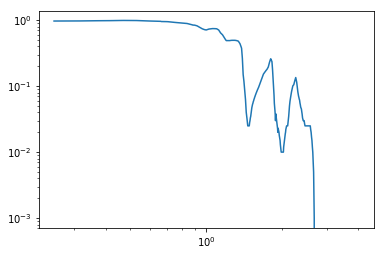

In [4]:
plt.plot(wlalb2,sbdarti)
plt.xscale('log')
plt.yscale('log')

In [5]:
manifest = {}
with open("manifest.txt","r") as mn:
    lines = mn.read().split('\n')
    for l in lines:
        lfile = l.split()
        if len(lfile)>0:
            manifest[lfile[0]] = lfile[1]

In [6]:
names = sorted(manifest.keys())
ix = 0
for n in names:
    print ix,n
    ix+=1

0 andesitefine
1 andesitesolid
2 basaltsolid
3 brownsand
4 clearice
5 coarsesnow
6 dunesand
7 finesnow
8 frost
9 mediumsnow
10 seafoam
11 seawater
12 tapwater
13 yellowloam
14 yellowsand


In [186]:
ids = [4,5,7,8,9]

In [187]:
for i in ids:
    print names[i]

clearice
coarsesnow
finesnow
frost
mediumsnow


In [188]:
iceweight=0.175
weights = np.array([iceweight,0.2*(1-iceweight),0.2*(1-iceweight),0.2*(1-iceweight),0.4*(1-iceweight)])
#weights[0] = 1.75*weights[0]
#weights[-1] = 1.75*weights[-1]
#weights[1:-1] -= (weights[0]+weights[-1])/1.75*0.75/len(weights[1:-1])

In [189]:
print np.sum(weights),weights

1.0 [0.175 0.165 0.165 0.165 0.33 ]


In [190]:
wvref = np.loadtxt("wvref.txt")

In [191]:
print wvref.shape
print wvref.min()

(965,)
0.34


In [192]:
specs = np.zeros((len(ids),wvref.shape[0]))


In [193]:
for idn in range(len(ids)):
    filename = manifest[names[ids[idn]]]
    with open(filename,"r") as fileobj:
        text = fileobj.read().split('\n')
        for k in range(len(text)):
            if text[k].split()[0]=="Additional":
                nhead = k+2
                break
    spec = np.loadtxt(filename,skiprows=nhead,ndmin=2).transpose()
    if spec[0,0] > spec[0,-1]:
        spec = np.flip(spec,axis=1)
    specs[idn,:] = np.interp(wvref,spec[0,:],spec[1,:])

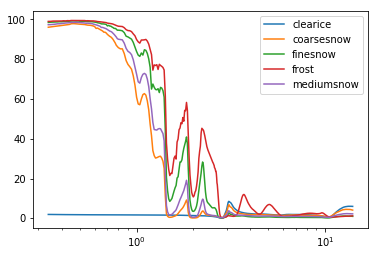

In [194]:
for idn in range(len(ids)):
    plt.plot(wvref,specs[idn,:],label=names[ids[idn]])
plt.xscale('log')
plt.legend()

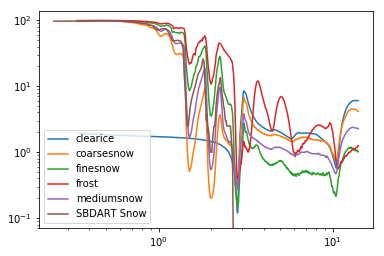

In [195]:
for idn in range(len(ids)):
    plt.plot(wvref,specs[idn,:],label=names[ids[idn]])
plt.plot(wlalb2,sbdarti*100,label="SBDART Snow")
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [174]:
wtspec = np.copy(specs)
for n in range(len(ids)):
    wtspec[n,:] *= weights[n]

In [175]:
netspec = np.sum(wtspec,axis=0)

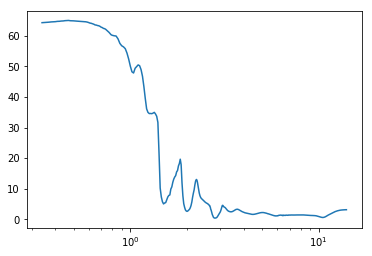

In [176]:
plt.plot(wvref,netspec)
plt.xscale('log')

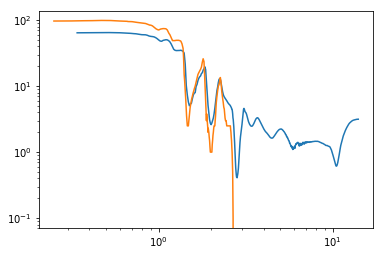

In [177]:
plt.plot(wvref,netspec)
plt.plot(wlalb2,sbdarti*100)
plt.xscale('log')
plt.yscale('log')

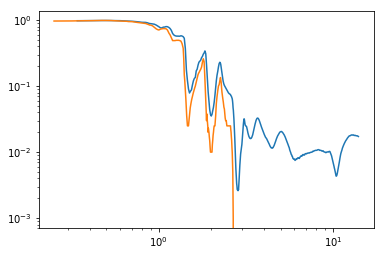

In [144]:
plt.plot(wvref,netspec*0.01)
plt.plot(wlalb2,sbdarti)
plt.xscale('log')
plt.yscale('log')

(0.34, 14.01)

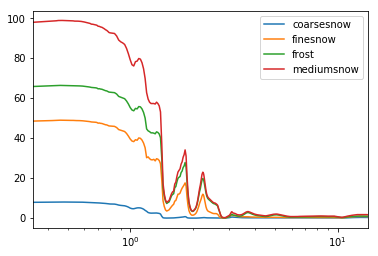

In [145]:
for n in range(len(ids)):
    plt.plot(wvref,np.sum(wtspec[:n+1,:],axis=0),label=names[ids[n]])
plt.xscale('log')
plt.legend()
plt.xlim(wvref.min(),wvref.max())

In [146]:
import colormatch as cm

In [147]:
print np.sum(weights)

1.0


In [148]:
def bbtemp(teff,wvref):
    sbk = 5.67e-8
    const = 0.0143877735383
    bbf = 1.0/wvref**5 * (1.0/(np.exp(const/(teff*wvref*1e-6))-1))
    return bbf

In [149]:
print wvref.min()


0.34


In [150]:
def bbtempf90(teff,wvref):
    sbk = 5.67e-8
    const = 0.0143877735383
    bbf = 1.0/wvref**5 * (1.0/(np.exp(1.0e6*const/(teff*wvref))-1))
    return bbf

In [151]:
rgbs = []
srgbs = []
albs = []
stemps = np.linspace(2800,7900,num=18)
print stemps
bbs = []
for s in range(0,len(stemps)):
    bbf = bbtemp(stemps[s],wvref)
    bbs.append(bbtemp(stemps[s]-650.0,wvref))
    refl = netspec*0.01*bbf
    albb = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bbf[:145],x=wvref[:145])
    albs.append(albb)
    #srgbs.append(cm.specs2rgb(wvref*1e3,[bbf,]))
    rgbs.append(cm.spec2rgb(wvref*1e3,refl,normalization=albb))
srgbs = cm.specs2rgb(wvref*1e3,np.array(bbs))

[2800. 3100. 3400. 3700. 4000. 4300. 4600. 4900. 5200. 5500. 5800. 6100.
 6400. 6700. 7000. 7300. 7600. 7900.]


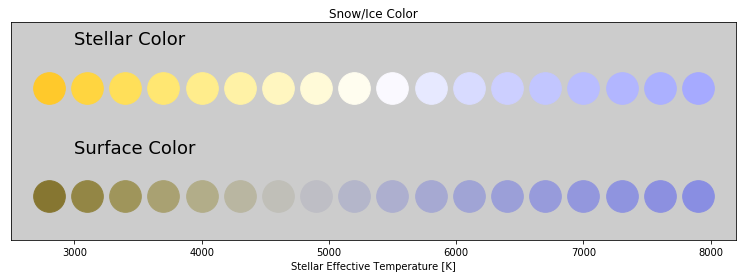

In [152]:
fig,ax=plt.subplots(figsize=(13,4))
for s in range(len(stemps)):
    plt.scatter(stemps[s],1.0,marker='o',color=np.array(rgbs[s])/np.amax(rgbs[s])*albs[s],s=1000)
    plt.scatter(stemps[s],1.25,marker='o',color=np.array(srgbs[s])/np.amax(srgbs[s]),s=1000)
    #plt.annotate("%d K"%stemps[s],(stemps[s]-100,1.35))
    #print stemps[s]
    #plt.axvline(stemps[s])
ax.set_facecolor('0.8')
plt.annotate("Stellar Color",(3000,1.35),color='k',fontsize=18)
plt.annotate("Surface Color",(3000,1.1),color='k',fontsize=18)
plt.ylim(0.9,1.4)
plt.xlim(2500,8200)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False)
plt.xlabel("Stellar Effective Temperature [K]")
plt.title("Snow/Ice Color")
plt.savefig("colorgrid_snow.png",bbox_inches='tight')

In [153]:
alb1 = np.zeros(100)
alb2 = np.zeros(100)
albb = np.zeros(100)
teffs = np.linspace(2700,6000,num=100)

In [154]:
for n in range(100):
    bbf = bbtemp(teffs[n],wvref)
    refl = netspec*0.01*bbf
    alb1[n] = np.trapz(refl[:42],x=wvref[:42])/np.trapz(bbf[:42],x=wvref[:42])
    alb2[n] = np.trapz(refl[42:145],x=wvref[42:145])/np.trapz(bbf[42:145],x=wvref[42:145])
    albb[n] = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bbf[:145],x=wvref[:145])

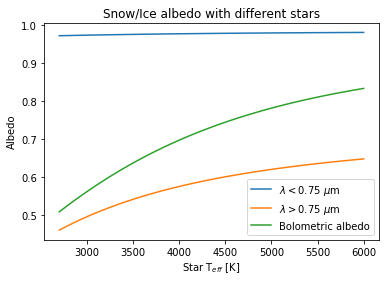

In [155]:
plt.plot(teffs,alb1,label="$\lambda<{0.75}$ $\mu$m")
plt.plot(teffs,alb2,label="$\lambda>{0.75}$ $\mu$m")
plt.plot(teffs,albb,label='Bolometric albedo')
plt.legend(loc='best')
plt.xlabel("Star T$_{eff}$ [K]")
plt.ylabel("Albedo")
plt.title("Snow/Ice albedo with different stars")
plt.savefig("snow_bolometric.png",bbox_inches='tight')

In [156]:
print teffs[-16],albb[-7]

5500.0 0.8244958801370323


In [32]:

wv1=np.zeros(1024) #Wavelengths in meters up to 0.75 microns
wv2=np.zeros(1024) #Wavelength in meters starting at 0.75 microns
wvm1=np.zeros(1024) #Wavelengths in microns up to 0.75 microns
wvm2=np.zeros(1024) #Wavelength in microns starting at 0.75 microns
bb1=np.zeros(1024) #Planck function for x<0.75 microns
bb2=np.zeros(1024) #Planck function for x>0.75 microns

In [41]:
def plasimspec(starbbtemp=5772.0,wmin=3.16036116751e-7):
    wv2 = np.zeros(1024)
    wv1 = np.zeros(1024)
    wvm1 = np.zeros(1024)
    wvm2 = np.zeros(1024)
    bb1 = np.zeros(1024)
    bb2 = np.zeros(1024)

    const = 0.0143877735383
    
    #wmin = 3.05994e-7 # Set minimum wavelength to 305 nm; we don't include UV. 
                             # This produces zsolar1=0.517 at Teff=5772 K.
    lwmin = np.log10(wmin)
           
    hinge = np.log10(7.5e-7) #We care about amounts above and below 0.75 microns
    dl1 = (hinge-lwmin)/1024.0
    dl2 = (-4-hinge)/1024.0
           
    for k in range(1024):
        wv1[k] = 10**(lwmin + k*dl1)
        wv2[k] = 10**(hinge + k*dl2)
           
    for k in range(1024):
        wvm1[k] = (1.0e6 * wv1[k])**5
        wvm2[k] = (1.0e6 * wv2[k])**5
           
#            const1 = 2*planckh*(cc**2)
    const2 = const/starbbtemp
           
    for k in range(1024): #Compute the Planck function
        bb1[k] = 1.0/wvm1[k] * 1.0/(np.exp(const2/wv1[k])-1) #const1/wv1(k)**5
        bb2[k] = 1.0/wvm2[k] * 1.0/(np.exp(const2/wv2[k])-1)
#              write(nud,*) wv1(k),bb1(k),wv2(k),bb2(k)
         #The scaling and units don't actually matter, because we're going to normalize
    
    z1 = 0.0
    z2 = 0.0
    for k in range(1023):    #Do a trapezoidal integration above and below 0.75 microns
        z1 = z1 + 0.5*(bb1[k]+bb1[k+1])*(wv1[k+1]-wv1[k])
        z2 = z2 + 0.5*(bb2[k]+bb2[k+1])*(wv2[k+1]-wv2[k])
        
    z1 = z1 + 0.5*(bb1[1023]+bb2[0])*(wv2[0]-wv1[1023])
        
    zdenom1 = 0.01/z1
    zdenom2 = 0.01/z2
        
    znet = z1+z2
        
    z1 = z1/znet
    z2 = 1.0-z1
        
    zsolar1 = z1
    zsolar2 = z2
    return zsolar1,zsolar2,zdenom1,zdenom2

In [44]:
print wvref.min()


0.34


In [196]:
print plasimspec()
low = 0.0
high = 1.0
nsteps = 50
target = 0.6
z1,z2,zd1,zd2 = plasimspec()
for n in range(nsteps):
    mid = 0.5*(low+high)
    iceweight=mid
    weights = np.array([iceweight,0.2*(1-iceweight),0.2*(1-iceweight),0.2*(1-iceweight),0.4*(1-iceweight)])
    wtspec = np.copy(specs)
    for n in range(len(ids)):
        wtspec[n,:] *= weights[n]
    netspec = np.sum(wtspec,axis=0)
    #netspec[:] = 100.
    bb3 = bbtemp(5772.0,wvref)
    refl = netspec*0.01*bb3
    a1 = 0.0
    a2 = 0.0
    for k in range(41): #Compute insolation-weighted albedo below 0.75 microns
#           a1 = a1 + 0.5*(bb3(k)*fsnowalb(k)+bb3(k+1)*fsnowalb(k+1))* &
#      &              1.0e-6*(wavelengths(k+1)-wavelengths(k))
            a1 = a1 + 0.5*(refl[k]+refl[k+1])*1.0e-6*(wvref[k+1]-wvref[k])
    for k in range(41,964): #Compute insolation-weighted albedo above 0.75 microns
#           a2 = a2 + 0.5*(bb3(k)*fsnowalb(k)+bb3(k+1)*fsnowalb(k+1)))* &
#      &              1.0e-6*(wavelengths(k+1)-wavelengths(k))
            a2 = a2 + 0.5*(refl[k]+refl[k+1])*1.0e-6*(wvref[k+1]-wvref[k])
    a1 *= 100*zd1
    a2 *= 100*zd2
    alb10 = np.trapz(refl[:42],x=wvref[:42])/np.trapz(bb3[:42],x=wvref[:42])
    alb20 = np.trapz(refl[42:145],x=wvref[42:145])/np.trapz(bb3[42:145],x=wvref[42:145])
    albb0 = z1*a1+z2*a2#np.trapz(refl[:145],x=wvref[:145])/np.trapz(bb0[:145],x=wvref[:145])
    if albb0>target: #Not enough water; increase
        low=mid
        high=high
    else: #Too much water; reduce
        high=mid
        low=low
    print mid,albb0,a1,a2#,alb10,alb20

(0.516999999973378, 0.483000000026622, 120064.76277938968, 128516.5266052313)
0.5 0.3910938491093107 0.47832242974283545 0.29772495432106144
0.25 0.5779219183807418 0.708694143302926 0.4379441952387929
0.125 0.6713359530164571 0.8238800000829712 0.5080538156976582
0.1875 0.6246289356985993 0.7662870716929486 0.4729990054682253
0.21875 0.6012754270396711 0.737490607497937 0.4554716003535105
0.234375 0.5895986727102062 0.7230923754004318 0.4467078977961507
0.2265625 0.5954370498749387 0.7302914914491845 0.4510897490748307
0.22265625 0.598356238457305 0.7338910494735611 0.4532806747141706
0.220703125 0.5998158327484879 0.7356908284857492 0.45437613753384015
0.2197265625 0.6005456298940788 0.7365907179918432 0.4549238689436737
0.22021484375 0.6001807313212832 0.7361407732387961 0.45465000323875676
0.220458984375 0.5999982820348864 0.7359158008622724 0.4545130703863003
0.220336914062 0.6000895066780847 0.7360282870505341 0.4545815368125285
0.220397949219 0.6000438943564852 0.735972043956403

In [197]:
specvar = "iceblend"
specinttext = ""
for n in range(len(ids)):
    specinttext+="%s:\t%f\n"%(names[ids[n]],weights[n])
specinttext += "       real :: %s(%d) = (/"%(specvar,len(wvref))
specinttext += ",".join(["%.4f" % number for number in netspec[0:8]]) + ", &\n"
n=8
while n+8<len(wvref):
    specinttext += "      &          " + ",".join(["%.4f" % number for number in netspec[n:n+8]]) + ", &\n"
    n+=8
specinttext += "      &          " + ",".join(["%.4f" % number for number in netspec[n:]]) + " /)"

In [198]:
newfilename = specvar+"_interp_f90.txt"
with open(newfilename,"w") as fileobj:
    fileobj.write(specinttext+'\n')

In [199]:
print specinttext

clearice:	0.220457
coarsesnow:	0.155909
finesnow:	0.155909
frost:	0.155909
mediumsnow:	0.311817
       real :: iceblend(965) = (/76.5831,76.6438,76.7246,76.7803,76.8781,76.9153,76.9738,77.0573, &
      &          77.1100,77.1962,77.2366,77.3703,77.3868,77.3909,77.3595,77.3408, &
      &          77.2787,77.2429,77.2131,77.1866,77.0807,77.0771,77.0496,76.9933, &
      &          76.9307,76.8156,76.6748,76.4445,76.3496,76.1804,76.0106,75.7067, &
      &          75.6455,75.4641,75.3821,75.1899,74.8131,74.6450,74.3874,74.2458, &
      &          73.9713,73.6175,73.2059,72.8285,72.3517,71.8928,71.6702,71.4964, &
      &          71.4047,70.2676,68.4786,67.5829,67.1136,66.4212,64.6907,62.3396, &
      &          59.5691,57.3820,56.9208,58.7662,59.4444,60.0964,59.7967,58.2365, &
      &          55.6891,51.6068,46.9814,42.8594,41.5179,41.0608,41.0912,41.0255, &
      &          41.2415,41.5225,40.8844,39.9752,37.5794,25.3568,11.8465,8.3604, &
      &          6.4608,5.6337,5.9680,6.1563,7.25